<a href="https://colab.research.google.com/github/keulreobeu/bigdate_student/blob/main/%EC%83%88%EC%8B%B9_%ED%97%AC%EC%8A%A4%EC%BC%80%EC%96%B4_%EC%84%9C%EB%B9%84%EC%8A%A4%EA%B8%B0%ED%9A%8D/%EC%9E%84%EB%B2%A0%EB%94%A9_H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텍스트 임베딩

`작성자: 최원칠 강사`   
`traveler4d@gmail.com`


BoW, TF-IDF에서는 단어의 순서, 주변 단어 등 문맥에 대한 정보가 제대로 반영되지 않습니다. 즉 단어의 문맥적인 의미를 파악할 수 없다는 문제가 존재합니다.   
또한, 사용하는 토큰이 많아질 수록 문장을 표현할때 필요한 벡터 차원이 커진다는 문제도 포함합니다.

임베딩 기법은 단어를 저차원 벡터 공간에 매핑하여 단어 간 의미적 유사도를 학습하여 벡터의 값을 설정 합니다.

- **단어 간 의미 관계 학습**: 의미가 유사하거나 관련 있는 단어들이 벡터 공간에서 가깝게 배치되어, 모델이 의미적 맥락을 더 잘 이해.

- **문맥 정보 반영**: 단어가 등장하는 주변 단어, 문맥 등을 고려하여 학습하기에, 단어가 어떤 의미인지를 더 정확히 파악

- **차원 축소 및 일반화**:저차원 벡터에 정보를 압축하여 메모리 사용량을 줄이고, 모델 학습 시 일반화에 유리


임베딩 기법은 크게 단어 임베딩과 문장 임베딩으로 나뉩니다.


In [3]:
import zipfile
import os

zip_filename = '텍스트마이닝.zip'
extract_folder = '/content'

os.makedirs(extract_folder, exist_ok=True)

with zipfile.ZipFile(zip_filename, 'r') as zipf:
    zipf.extractall(extract_folder)

In [22]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = '/content/NanumGothic.ttf'       # 설치한 폰트 경로
fm.fontManager.addfont(font_path)   # 폰트 경로 추가

plt.rcParams['font.family'] = 'NanumGothic' # 사용 폰트 입력
plt.rcParams['axes.unicode_minus'] = False  # 음수 부호 사용

In [2]:
!pip install "scipy<1.13"

In [1]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 25.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# 데이터 로드
data = pd.read_csv('./data/sentence2_tag.csv').dropna()
sentences = data['text_tag'].apply(lambda x: x.split()).to_list()
sentences[:5]

[['선물',
  '수신자',
  '못',
  '연락',
  '제대로',
  '기프',
  '티',
  '콘',
  '못',
  '문의',
  '수신',
  '오류',
  '못',
  '설명',
  '못',
  '사람',
  '간혹',
  '어',
  '이',
  '못',
  '사람',
  '제대로',
  '후속',
  '조치',
  '계속',
  '실수',
  '반복',
  '사실',
  '못',
  '고객',
  '수신',
  '상',
  '오류',
  '발송',
  '사람',
  '실수',
  '구매자',
  '길',
  '자기',
  '잘못',
  '도',
  '상',
  '담사',
  '태도',
  '발송',
  '정상',
  '그냥',
  '오류',
  '못',
  '다',
  '다시',
  '문제',
  '끝',
  '사죄',
  '말',
  '상담',
  '물건',
  '이전',
  '고객',
  '응대',
  '서비스',
  '측면',
  '매우',
  '상',
  '담사',
  '잘못',
  '업체',
  '잘못',
  '그냥',
  '수신',
  '오류',
  '못',
  '수신자',
  '내',
  '선물',
  '가만',
  '기간',
  '만료',
  '누구',
  '잘못',
  '선물',
  '확인',
  '잘못',
  '업체',
  '잘못',
  '말',
  '기프',
  '티',
  '콘',
  '구매',
  '바로',
  '타인',
  '구매',
  '업체',
  '생각',
  '메시지',
  '사후',
  '확인',
  '필요'],
 ['이제',
  '다시',
  '구매',
  '오래',
  '전',
  '이번',
  '일',
  '이제',
  '그만',
  '쿠폰',
  '사용',
  '때',
  '이미',
  '사용',
  '쿠폰',
  '판매',
  '자분',
  '문',
  '답',
  'ㄷ',
  '쿠폰',
  '발행',
  '과정',
  '이상',
  '방법',
  '경찰서',
  '신고',
  '쿠폰',
  '경찰

## word2vec 단어 임베딩
word2vec 모델은 키워드 간의 유사도를 학습하여 단어 임베딩을 만드는 대표적인 모델입니다.

`gensim` 라이브러리를 활용하여 `Word2vec`모델을 구성하고 학습이 가능합니다.

### word2vec 학습 하기
word2vec는 같이 자주 등장 하는 단어들을 학습하기 위해 중심 단어에서 설정한 윈도우 크기안에 들어오는 단어를 주변 단어로 설정하여 학습합니다.  

*윈도우 예시*  
<rigth><img src="https://drive.google.com/thumbnail?id=1SQreMUvM2SNXhHq75vQAZwITvvffKy8u&sz=w1000" width="500"/></rigth>

모델에 입력된 단어들은 임베딩 행렬(Embedding Matrix)을 거처 임베딩 벡터로 바뀌고 벡터는 주변단어와의 유사도가 높은 값으로 학습이 진행됩니다.

*임베딩 행렬 예시*
<center><img src="https://drive.google.com/thumbnail?id=1-8pkBika8xyRQ7nX7XqeK9UYiXqhK9C9&sz=w1000" width="600"/></center>

이때 대표적인 학습 알고리즘으로 **Skip-gram**과 **CBOW**을 활용합니다.

- **Skip-gram**: 중심 단어로 주변 단어를 예측하는 방식
    * 학습시 입력이 중심단어 라벨이 주변단어
    * 희소 데이터(드물게 등장하는 단어)를 더 잘 학습
    * 계산 비용이 높음 (모든 주변 단어를 처리해야 함)
    
- **CBOW** (Continuous Bag of Words): 주변 단어들로 중심 단어를 예측하는 방식.
    * 학습시 입력이 주변단어 라벨이 중심단어
    * 희소 데이터 처리 능력이 상대적으로 약함
    * 계산 비용이 낮고, 빠르게 학습

*CBOW 예시*
<center><img src="https://drive.google.com/thumbnail?id=1ic0oIy6vF2ZK3qgcStky9a0WblpgY33-&sz=w1000" width="600"/></center>

In [ ]:
from gensim.models import Word2Vec

# Word2Vec 모델 학습
model = Word2Vec(sentences, # 학습 문장 세트
                 vector_size=100, # 임베딩 벡터 사이즈
                 window=5,  # 윈도우 크기
                 min_count=2,  # 최소 빈도
                 workers=4,  # 사용 코어 개수
                 sg=1, # 알고리즘 설정
                 epochs=50 # 반복횟수
                )

> `sg=1`: skip-gram 사용    
> `sg=0`: CBOW 사용   
> 임베딩 벡터 사이즈는 클수록 많은 정보를 담지만 토큰의 개수와 텍스트양에 따라 적절한 값을 설정해주어야 함

In [ ]:
# 상위 10개의 키워드 보기
keywords = model.wv.index_to_key
keywords[:10]

['구매', '사용', '바로', '선물', '할인', '가격', '쿠폰', '이용', '문자', '콘']

#### 유사 키워드 추출
- most_similar() 함수를 통해 코사인 유사도를 계산하여 가까운 상위 키워드 추출

In [ ]:
# 유사한 단어 추출
keyword='사용'
similar_words = model.wv.most_similar(keyword, topn=20)
similar_words

[('구매', 0.7260239720344543),
 ('가능', 0.6870179176330566),
 ('전입', 0.6855435371398926),
 ('바로', 0.6639735102653503),
 ('구입', 0.6639148592948914),
 ('결제', 0.6360037922859192),
 ('이용', 0.6307299137115479),
 ('칼국수', 0.6283524632453918),
 ('틈틈히', 0.6189775466918945),
 ('쓰임', 0.6140416860580444),
 ('문자', 0.6139146089553833),
 ('쿠폰', 0.6132185459136963),
 ('범용', 0.6097506284713745),
 ('기일', 0.6077592968940735),
 ('전식', 0.601246178150177),
 ('안습', 0.5962167382240295),
 ('가정상비약', 0.59553462266922),
 ('하세오', 0.5945011377334595),
 ('다용도', 0.5894657373428345),
 ('도입', 0.5893159508705139)]

두개의 키워드를 동시에 유사도 알고리즘에 넣어 두 키워드에 공통적으로 가까운 키워드를 추출해봅니다.

In [ ]:
# 두개의 키워드를 사용
keyword=['사이즈', '사용']
similar_words = model.wv.most_similar(keyword, topn=20)
similar_words

[('중형', 0.6575765609741211),
 ('얼굴', 0.6529937386512756),
 ('구매', 0.6233907341957092),
 ('덩치', 0.6065625548362732),
 ('고등', 0.5995352864265442),
 ('큰애', 0.5957804918289185),
 ('대형', 0.5939127206802368),
 ('대소', 0.574553906917572),
 ('큰아이', 0.5715423822402954),
 ('사려', 0.5529113411903381),
 ('분석', 0.5507709383964539),
 ('실착', 0.5443854928016663),
 ('후반', 0.5442395806312561),
 ('남매', 0.5421767234802246),
 ('통통', 0.5390098094940186),
 ('핑크', 0.5386844873428345),
 ('스탈', 0.538648784160614),
 ('센치', 0.5379734039306641),
 ('한국', 0.5372086763381958),
 ('오다', 0.5364035964012146)]

`negative` 인자를 추가로 활용하여 유사도 거리가 먼 키워드를 찾을 수 있습니다.

- `positive`: 입력된 키워드에 거리가 가까운 키워드들을 찾음
- `negative`: 입력된 키워드에 거리가 먼 키워드들을 찾음

In [ ]:
# 부정 키워드를 사용
keyword='사이즈'
neg_key = '청소년'
similar_words = model.wv.most_similar(keyword, negative=neg_key, topn=20)
similar_words

[('라이트', 0.35297107696533203),
 ('실착', 0.3315500319004059),
 ('색상', 0.3271895945072174),
 ('방어', 0.324524849653244),
 ('질감', 0.30386820435523987),
 ('지만', 0.30222299695014954),
 ('구매', 0.2956835627555847),
 ('성능', 0.29308539628982544),
 ('야외', 0.2785642147064209),
 ('사려', 0.27324527502059937),
 ('핏', 0.2729915678501129),
 ('황사', 0.2698463201522827),
 ('역시', 0.26947128772735596),
 ('고', 0.26781973242759705),
 ('활동', 0.2621813714504242),
 ('뒤', 0.26191726326942444),
 ('대박', 0.25691333413124084),
 ('부모', 0.2519325315952301),
 ('높이', 0.2517985701560974),
 ('이전', 0.2503742277622223)]

### 유사 키워드 시각화(응용)

실제 임베딩 벡터는 매우 큰 차원을 가지기 때문에 그래프로 시각화가 어렵습니다.   
하지만 임베딩 벡터를 PCA로 차원축소를 한다면 간단한 산점도 그래프로 시각화가 가능해집니다.

#### 벡터 추출
`model.wv[키워드]` 를 활용하여 키워드의 임베딩 벡터를 가져옵니다.

In [ ]:
keyword='사용'
model.wv[keyword]

array([ 0.12297412,  0.09828375,  0.19327287, -0.16695316,  0.08397198,
       -0.41193244,  0.3170977 ,  0.2744081 , -0.280513  , -0.22448646,
        0.28851822, -0.22877991, -0.02496547, -0.01344776, -0.2447038 ,
       -0.34776273, -0.07969957, -0.11577457, -0.38106817, -0.30608657,
        0.17338102, -0.07798514,  0.06059771, -0.27393025, -0.07095611,
       -0.03701061, -0.25430822,  0.05608535, -0.09578858,  0.17234696,
       -0.00084797, -0.02865121,  0.05852053, -0.37321472, -0.05879626,
        0.134609  ,  0.21807092, -0.25000212, -0.08585966, -0.03784231,
        0.20347683, -0.09538691,  0.05049271,  0.1014885 , -0.02205878,
       -0.00706526, -0.0338842 ,  0.22481398,  0.2649284 ,  0.15695366,
        0.19542186, -0.24106905,  0.02789891, -0.10087156, -0.08109636,
        0.01290153,  0.09230445,  0.05540919, -0.02219728,  0.06513275,
       -0.04109507,  0.19496407,  0.00957344, -0.12959772, -0.08824144,
        0.14820631, -0.2439705 ,  0.2721297 , -0.31068125,  0.02

#### 유사 단어의 벡터 추출

In [ ]:
keyword='사용'
similar_words = model.wv.most_similar(keyword, topn=20)
words = [keyword] + [word for word, _ in similar_words]
vectors = [model.wv[word] for word in words]
vectors[0]

array([-2.39243224e-01,  2.14379504e-01,  3.69550675e-01,  3.33561808e-01,
        2.93216914e-01, -1.06789976e-01,  1.47903025e-01,  4.01102662e-01,
        1.95830837e-01, -1.98129833e-01, -3.14480931e-01, -2.53043145e-01,
        1.05526797e-01,  2.25433215e-01,  3.29965740e-01, -4.04085517e-02,
       -9.61895660e-03,  1.61028892e-01,  1.92328915e-01, -4.24649566e-01,
        3.28739695e-02, -8.26714262e-02, -2.40939688e-02, -2.30162796e-02,
       -8.71572718e-02, -8.62511341e-03, -1.12328656e-01,  2.06538454e-01,
       -1.88686997e-01, -2.10711077e-01,  5.90085350e-02, -4.91263606e-02,
        3.52736264e-02, -1.91503450e-01, -3.42532136e-02,  2.58716285e-01,
        6.80454597e-02, -8.62118527e-02,  1.33658603e-01, -6.42801896e-02,
        3.14108431e-01, -1.49569213e-01, -2.88415760e-01, -9.06551108e-02,
        1.03241177e-02,  2.73139983e-01,  2.26315975e-01, -1.98437527e-01,
       -3.43598016e-02, -1.40474632e-01,  1.17270395e-01,  1.13567986e-01,
       -5.67307509e-02,  

> 100개의 실수값으로 구현된 임베딩 벡터 확인

#### PCA 차원축소


`sklearn.decomposition` 모듈의 `PCA` 객체를 활용하여 간단하게 PCA 차원 축소가 가능합니다.

* 데이터 분산(Variance)을 최대한 보존하는 방향 벡터를 구현
* 분산이 큰 순으로 축(주성분)을 선택하고 나머지 축(노이즈)은 주성분 축에 투영
* 데이터의 손실이 발생하긴 하지만 중요 정보는 최대한 유지

`n_components` 인자에 남길 차원의 개수를 입력하여 축소를 합니다.

In [ ]:
from sklearn.decomposition import PCA

# PCA로 2차원 변환
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)
reduced_vectors

array([[-0.12642323,  0.05093097],
       [-0.54258306, -0.22626285],
       [-0.07591832,  0.19821841],
       [ 0.19176046,  0.47320705],
       [-0.48635683,  0.4497823 ],
       [-0.44087437, -0.43346215],
       [-0.73471499,  0.28579729],
       [-0.7567416 , -0.68008939],
       [ 0.02821947, -0.10836515],
       [-0.17298716, -0.34136748],
       [ 0.12029779,  0.03061876],
       [-0.68056137,  0.79907515],
       [-0.5300943 ,  0.5782143 ],
       [ 0.76242197, -0.84504926],
       [ 0.7626967 ,  1.25902667],
       [ 0.99813774, -0.20658329],
       [ 0.38030094,  0.17682315],
       [ 0.49543433, -0.6238407 ],
       [ 0.93050917,  0.50911038],
       [ 0.7114744 , -0.73922449],
       [-0.83399774, -0.60655966]])

> `n_components` 인자에 남길 축의 개수를 설정

#### 산점도 시각화

PCA 차원축소한 벡터를 2차원의 산점도 그래프로 그리고 벡터에 해당하는 키워드를 텍스트로 입력하여 키워드간의 유사도 거리감을 시각화 합니다.

C:\Users\trave\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


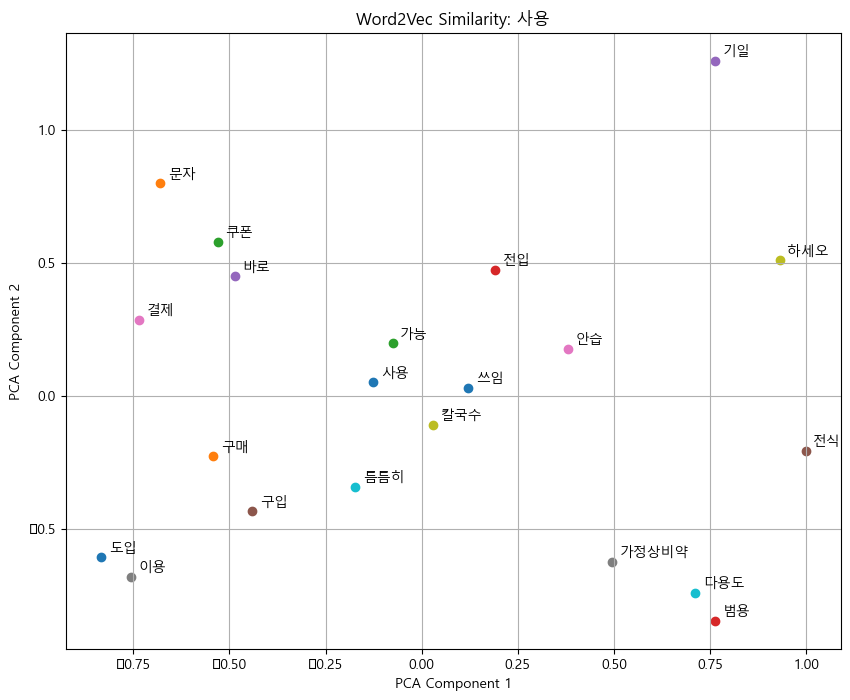

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

# 산점도 그리기
plt.figure(figsize=(10, 8))

for i, word in enumerate(words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
    plt.annotate(word, (reduced_vectors[i, 0] + 0.02, reduced_vectors[i, 1] + 0.02))

plt.title(f"Word2Vec Similarity: {keyword}")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

C:\Users\trave\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


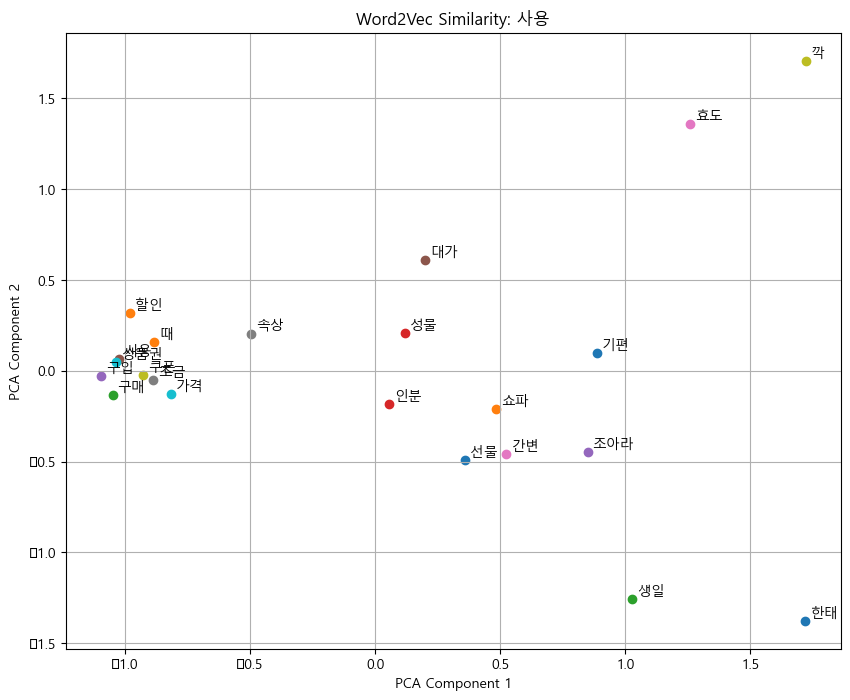

In [ ]:
similar_words = model.wv.most_similar(['선물', '할인'],  topn=20)
words = ['선물', '할인'] + [word for word, _ in similar_words]
vectors = [model.wv[word] for word in words]

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

plt.figure(figsize=(10, 8))

for i, word in enumerate(words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
    plt.annotate(word, (reduced_vectors[i, 0] + 0.02, reduced_vectors[i, 1] + 0.02))

plt.title(f"Word2Vec Similarity: {keyword}")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

C:\Users\trave\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


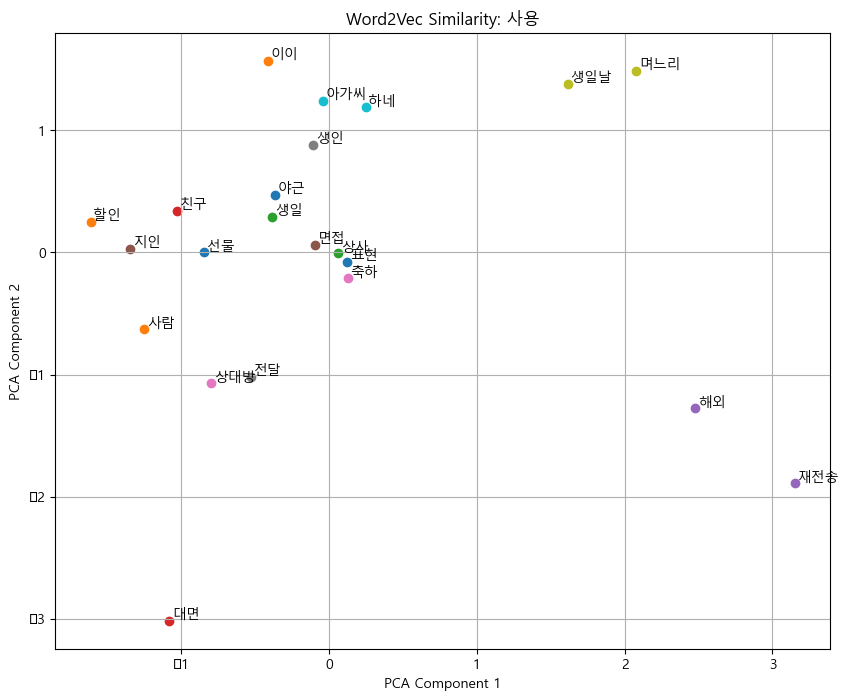

In [ ]:
similar_words = model.wv.most_similar(positive='선물', negative='할인',  topn=20)
words = ['선물', '할인'] + [word for word, _ in similar_words]
vectors = [model.wv[word] for word in words]

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

plt.figure(figsize=(10, 8))

for i, word in enumerate(words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
    plt.annotate(word, (reduced_vectors[i, 0] + 0.02, reduced_vectors[i, 1] + 0.02))

plt.title(f"Word2Vec Similarity: {keyword}")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

## Bert 문장 임베딩
BERT는 Transformer 아키텍처를 기반으로 한 딥러닝 사전 학습 모델로, 양방향 문맥 정보를 활용하여 단어 또는 문장 임베딩을 생성   
BERT는 사전 학습 모델이므로 추가적인 학습 없이도 문장간의 유사도를 추출 가능

In [ ]:
!pip install numpy==1.26.4

     ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
      --------------------------------------- 0.2/15.8 MB 6.7 MB/s eta 0:00:03
     -- ------------------------------------- 1.0/15.8 MB 12.4 MB/s eta 0:00:02
     ----- ---------------------------------- 2.0/15.8 MB 16.1 MB/s eta 0:00:01
     ------- -------------------------------- 3.0/15.8 MB 19.1 MB/s eta 0:00:01
     ---------- ----------------------------- 4.0/15.8 MB 19.6 MB/s eta 0:00:01
     ------------- -------------------------- 5.5/15.8 MB 21.9 MB/s eta 0:00:01
     ----------------- ---------------------- 7.0/15.8 MB 23.5 MB/s eta 0:00:01
     ------------------- -------------------- 7.8/15.8 MB 22.7 MB/s eta 0:00:01
     ------------------------ --------------- 9.6/15.8 MB 24.5 MB/s eta 0:00:01
     -------------------------- ------------ 10.6/15.8 MB 27.3 MB/s eta 0:00:01
     ---------------------------- ---------- 11.6/15.8 MB 26.2 MB/s eta 0:00:01
     ------------------------------ -------- 12.4

ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\trave\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\~umpy.libs\\libscipy_openblas64_-caad452230ae4ddb57899b8b3a33c55c.dll'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install sentence-transformers

In [ ]:
!pip install tf-keras

ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\trave\\AppData\\Roaming\\Python\\Python310\\site-packages\\~ensorflow\\compiler\\mlir\\lite\\python\\_pywrap_converter_api.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached tf_keras-2.18.0-py3-none-any.whl (1.7 MB)
  Using cached tensorflow-2.18.0-cp310-cp310-win_amd64.whl (7.5 kB)
  Using cached tensorflow_intel-2.18.0-cp310-cp310-win_amd64.whl (390.0 MB)
  Using cached tensorboard-2.18.0-py3-none-any.whl (5.5 MB)
  Using cached keras-3.7.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorflow-intel
    Found existing installation: tensorflow-intel 2.17.0
    Uninstalling tensorflow-intel-2.17.0:
      Successfully uninstalled tensorflow-intel-2.17.0


### SentenceTransformer 활용
SentenceTransformer는 쉽게 사전학습된 BERT 모델을 불러오고 문장의 임베딩을 추출하게 해주는 모듈
- [huggingface](https://huggingface.co/models?pipeline_tag=sentence-similarity&language=ko&sort=downloads) 사이트에서 문장 유사도 모델을 찾을수 있음

#### 사전학습 모델 다운로드

In [ ]:
from sentence_transformers import SentenceTransformer
import pandas as pd

# 데이터 로드
data = pd.read_csv('data/nreview_mask.csv')
sentences = data['text'].dropna().tolist()

# SentenceTransformer 모델 로드
model = SentenceTransformer('all-MiniLM-L6-v2')


C:\Users\trave\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\trave\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\trave\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


#### 문장 임베딩 추출

In [ ]:
embeddings = model.encode(sentences[:10])

for sentence, embedding in zip(sentences, embeddings):
    print(f"문장: {sentence[:30]}...")
    print(f"임베딩 벡터: {embedding[:10]}...")  # 벡터의 첫 10개 요소만 출력
    print(f"벡터 크기: {embedding.shape}\n")


문장: 새부리 KF94 마스크를 검색하니 네이버 랭킹 상위에 ...
임베딩 벡터: [ 0.03655303 -0.00536463  0.04968592 -0.05321125 -0.01464538 -0.01838516
 -0.01386445  0.07304278 -0.06784945 -0.03629826]...
벡터 크기: (384,)

문장: 컬러 KF94 마스크를 너무나도 기다렸어요
예쁜 컬러에...
임베딩 벡터: [ 0.06450415 -0.04172768  0.02913872 -0.05954393 -0.0093342  -0.02831924
 -0.01361137  0.09671765 -0.07722645 -0.00704552]...
벡터 크기: (384,)

문장: 컬러 KF94 마스크를 너무나도 기다렸어요
세상 어디에...
임베딩 벡터: [ 0.05596509 -0.0561384   0.04466027 -0.02847603 -0.02202671 -0.02321676
  0.01395393  0.0774039  -0.04049097 -0.01290467]...
벡터 크기: (384,)

문장: 라이브 보고 방송하는언니 쓴거 넘 예뻐서 100개 주문...
임베딩 벡터: [ 0.03688027  0.04313881  0.0777944  -0.01839788 -0.01419348 -0.04649544
  0.01647789  0.04405183 -0.03892748 -0.04748149]...
벡터 크기: (384,)

문장: 고민고민하다 디럭스 실버를 주문했는데
진짜 이쁩니다. ...
임베딩 벡터: [-0.00042233  0.05491801  0.09193154  0.01433664  0.01221362 -0.08849619
 -0.0087803   0.04901488  0.00239856 -0.04552442]...
벡터 크기: (384,)

문장: 평소 쓰는 아에르 중형과 비교했을 때 비슷한 편인데 착...
임베딩 벡터: [-0.0172386   0.041

#### 문장 유사도 파악

In [ ]:
similarities = model.similarity(embeddings, embeddings)
pd.DataFrame(similarities)

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.884946,0.907352,0.790017,0.783958,0.745122,0.768970,0.827865,0.699399,0.890471
1,0.884946,1.000000,0.944825,0.717104,0.717887,0.648456,0.686042,0.830497,0.644632,0.824800
2,0.907352,0.944825,1.000000,0.774834,0.770545,0.727109,0.763452,0.863900,0.712453,0.887643
3,0.790017,0.717104,0.774834,1.000000,0.893397,0.924235,0.923720,0.815619,0.821783,0.841860
4,0.783958,0.717887,0.770545,0.893397,1.000000,0.860804,0.877171,0.779104,0.760194,0.782247
5,0.745122,0.648456,0.727109,0.924235,0.860804,1.000000,0.921316,0.808777,0.827178,0.838986
6,0.768970,0.686042,0.763452,0.923720,0.877171,0.921316,1.000000,0.807315,0.796366,0.849308
7,0.827865,0.830497,0.863900,0.815619,0.779104,0.808777,0.807315,1.000000,0.887270,0.868924
8,0.699399,0.644632,0.712453,0.821783,0.760194,0.827178,0.796366,0.887270,1.000000,0.767137
9,0.890471,0.824800,0.887643,0.841860,0.782247,0.838986,0.849308,0.868924,0.767137,1.000000


In [ ]:
embeddings = model.encode(sentences[:50])
use = model.encode(['마스크를 막상 사용해보니 너무 답답하고 불편했습니다'])

similarities = model.similarity(embeddings, use)
pd.DataFrame(similarities)

,0
0,0.431158
1,0.404298
2,0.444593
3,0.432391
4,0.460204
5,0.397836
6,0.419333
7,0.463054
8,0.359886
9,0.406855


---
# 실습 해보기

#### [실습]
pre_text.csv 의 클렌징 처리된 텍스트를 활용하여 word2vec 임베딩 및 중앙 키워드를 넣어  산점도 시각화 그리기



In [6]:
import pandas as pd

df = pd.read_csv('/content/pre_text2.csv')
df.head()

,id,date,text,rat,clean
0,euge****,22.09.16.,새부리 KF94 마스크를 검색하니 네이버 랭킹 상위에 뜨고 가격도 착해서 호기심에 ...,평점5,새부리 KF 마스크 검색 네이버 랭킹 상위 뜨 가격 호기심 주문 핑크 베이지 색상 ...
1,gemm****,22.05.03.,컬러 KF94 마스크를 너무나도 기다렸어요\n예쁜 컬러에 벌크포장과 저렴하면서 퀄리...,평점5,컬러 KF 마스크 컬러 벌크 포장 저렴 퀄리티 있 내심 생각 치 동호 런 칭 방송 ...
2,gemm****,22.05.06.,컬러 KF94 마스크를 너무나도 기다렸어요\n세상 어디에도 없는 라이트실버 H워월V...,평점5,컬러 KF 마스크 세상 없 라이트 실버 H 워 월 V 색상 은단 갈치 페라리 모데나...
3,jina****,22.07.22.,라이브 보고 방송하는언니 쓴거 넘 예뻐서 100개 주문했는데 가로사이즈가 저한테 좀...,평점5,라이브 보 방송 언니 주문 가로 사이즈 사진 부분 밀착 코 와이어 접 블로그 리뷰 ...
4,pim4****,22.10.21.,고민고민하다 디럭스 실버를 주문했는데\n진짜 이쁩니다. 과하지 않지만 평범하지도 않...,평점5,고민 고민 디럭스 실버 주문 과하 평범 좋 밝 옷 쓰 좋 얼굴 디럭스 사이즈 여유 ...


In [7]:
sentences = df['clean'].apply(lambda x: x.split()).to_list()
sentences[:5]

[['새부리',
  'KF',
  '마스크',
  '검색',
  '네이버',
  '랭킹',
  '상위',
  '뜨',
  '가격',
  '호기심',
  '주문',
  '핑크',
  '베이지',
  '색상',
  '서요',
  '무난',
  '화이트',
  '블랙',
  '핑크',
  '계열',
  '궁금',
  '하',
  '가격',
  '메리트',
  '장바구니',
  '담',
  '결제',
  '뜨',
  '주문',
  '하',
  '하루',
  '라이브',
  '하',
  '타이밍',
  '주문',
  '운',
  '좋',
  '아침',
  '반',
  '라방',
  '하',
  '주문',
  '성공',
  '당일',
  '출고',
  '담날',
  '받',
  '여름',
  '핑크',
  '가을',
  '겨울',
  '톤',
  '핑크',
  '살',
  '핑크',
  '베이지',
  '차분',
  '톤',
  '맘',
  '드',
  '후기',
  '중형',
  '일반',
  '대형',
  '사이즈',
  '중형',
  '주문',
  '넉넉',
  '맞',
  '남편',
  '맞',
  '웬만',
  '보통',
  '얼굴',
  '크기',
  '남성',
  '중형',
  'OK',
  '가로',
  '폭',
  '얼굴',
  '전체',
  '세로',
  '짧',
  '그렇',
  '부족',
  '사진',
  '미',
  '밋',
  '대형',
  '아이',
  '어른',
  '비교',
  '사이즈',
  '참',
  '벌크',
  '포장',
  '뜯',
  '때',
  '불량',
  '보이',
  '괜찮',
  '사용',
  '후기',
  '평범',
  '주',
  '일',
  '없',
  '바래',
  '가성',
  '마스크',
  '추천'],
 ['컬러',
  'KF',
  '마스크',
  '컬러',
  '벌크',
  '포장',
  '저렴',
  '퀄리티',
  '있',
  '내심',
  '생각',
  '치',
  '동호',
  '런',
  '칭'

In [8]:
from gensim.models import Word2Vec

# Word2Vec 모델 학습
model = Word2Vec(sentences, # 학습 문장 세트
                 vector_size=100, # 임베딩 벡터 사이즈
                 window=5,  # 윈도우 크기
                 min_count=2,  # 최소 빈도
                 workers=4,  # 사용 코어 개수
                 sg=1, # 알고리즘 설정
                 epochs=50 # 반복횟수
                )

In [9]:
# 상위 10개의 키워드 보기
keywords = model.wv.index_to_key
keywords[:10]

['좋', '마스크', '쓰', '같', '사이즈', '구매', '얼굴', '중형', '있', '디럭스']

In [10]:
# 유사한 단어 추출
keyword='마스크'
similar_words = model.wv.most_similar(keyword, topn=20)
similar_words

[('쓰', 0.6446624398231506),
 ('좋', 0.5949966311454773),
 ('같', 0.5388391613960266),
 ('있', 0.5359528064727783),
 ('되', 0.5301035642623901),
 ('킵스', 0.5281339287757874),
 ('터지', 0.5249658226966858),
 ('뒤늦', 0.5185781717300415),
 ('편견', 0.5135658979415894),
 ('화이팅', 0.5118797421455383),
 ('사이즈', 0.5097824335098267),
 ('깨', 0.5049417614936829),
 ('주근깨', 0.4996185600757599),
 ('세분', 0.4945905804634094),
 ('출근길', 0.4857548177242279),
 ('코프', 0.4838031828403473),
 ('이용하', 0.48243001103401184),
 ('아이리', 0.4820302426815033),
 ('시점', 0.48033618927001953),
 ('편하', 0.47802552580833435)]

In [13]:
keyword='마스크'
similar_words = model.wv.most_similar(keyword, topn=20)
words = [keyword] + [word for word, _ in similar_words]
vectors = [model.wv[word] for word in words]
vectors[0]

array([-0.23966162,  0.22805727,  0.204226  ,  0.07035354,  0.283609  ,
       -0.25370333,  0.16127509,  0.10683998, -0.04040179, -0.00647779,
       -0.10650591, -0.62435114, -0.22431678,  0.0873167 ,  0.173921  ,
        0.02302165,  0.36647186, -0.21514848, -0.11818732, -0.11582094,
        0.23177399, -0.19209263,  0.12616208, -0.2699791 , -0.08831356,
       -0.09851635, -0.06457863, -0.04950529, -0.16214989,  0.02182564,
        0.12106852,  0.11315767,  0.08135038, -0.16213642, -0.0721578 ,
       -0.09612422, -0.03059807,  0.00363318, -0.11288904, -0.09885745,
        0.2154894 , -0.01844916, -0.02339937, -0.1289495 ,  0.2564546 ,
        0.07943364, -0.09597238,  0.12290338,  0.16407678,  0.35684344,
       -0.01641085, -0.020727  ,  0.09550492,  0.04063883, -0.11997341,
        0.1741941 ,  0.12141156,  0.03809177, -0.00243068,  0.0774498 ,
       -0.01569674,  0.02860899,  0.05486913,  0.00906242, -0.13252471,
        0.25568107,  0.10918959,  0.06588256, -0.04970859,  0.44

In [14]:
from sklearn.decomposition import PCA

# PCA로 2차원 변환
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)
reduced_vectors

array([[-0.48180983,  0.06639259],
       [-0.83358383,  0.1383944 ],
       [-0.82693511, -0.17298031],
       [-1.03194164, -0.13303722],
       [-0.93034382, -0.20398709],
       [-1.06057531,  0.06354039],
       [ 0.68056321, -0.44965284],
       [ 1.23254729, -0.32920397],
       [ 0.62962363, -0.25694068],
       [ 1.26085028, -0.76213783],
       [ 0.46038761,  0.0114108 ],
       [-1.09795622, -0.64656478],
       [ 1.4385352 , -0.82974143],
       [-0.17960155,  0.48712584],
       [-0.10350821, -0.85582985],
       [ 0.57253613,  0.97099358],
       [-0.20997958, -0.42025085],
       [ 0.58244299,  0.23006453],
       [ 0.46255654,  0.7674156 ],
       [ 0.39934633,  2.32122253],
       [-0.96315411,  0.00376656]])

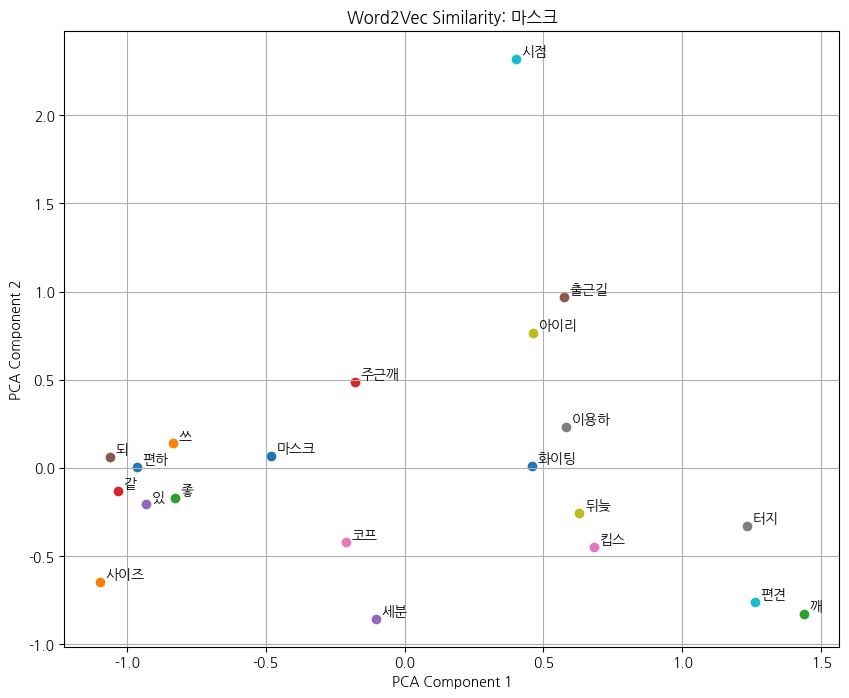

In [24]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

# 산점도 그리기
plt.figure(figsize=(10, 8))

for i, word in enumerate(words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
    plt.annotate(word, (reduced_vectors[i, 0] + 0.02, reduced_vectors[i, 1] + 0.02))

plt.title(f"Word2Vec Similarity: {keyword}")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()